In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [15]:
densities = ['/Volumes/4YP/Data/Densities/Density_5Years_Global_Total.npy', 
            '/Volumes/4YP/Data/Densities/Density_5Years_Global_Total_Stokes.npy',
            '/Volumes/4YP/Data/Densities/Density_5Years_Global_Total_Stokes_Eulerian.npy',
            '/Volumes/4YP/Data/Densities/Density_5Years_Global_Total_Stokes_Eulerian_NEW.npy']

titles = ['(a) NWD','(b) NWD + Stokes Drift','(c) NWD + Stokes Drift + WDE (Constant)','(d) NWD + Stokes Drift + WDE (M-Y 2.5)']

labels = ['NWD', 'NWD + Stokes Drift', 'NWD + Stokes Drift + WDE (Constant)', 'NWD + Stokes Drift + WDE (M-Y 2.5)']


In [16]:
def latitude(lat, direction):
    if direction == 'W':
        return 180 - lat
    if direction == 'E':
        return lat + 180

def longitude(lon, direction):
    if direction == 'N':
        return lon + 80
    if direction == 'S':
        return 80 - lon

In [17]:
latDA=np.linspace(-180,180,360)
lonDA=np.linspace(-80,80,160)

lat1 = latitude(90, 'W')
lat2 = latitude(10, 'W')

lat3 = latitude(120, 'E')
lat4 = latitude(80, 'W')

lon1 = longitude(0, 'N')
lon2 = longitude(80, 'N')

In [22]:
NA_zonal_mean = []
NA_meri_mean = []
NA_zonal_mean_norm = []
NA_meri_mean_norm = []

NP_zonal_mean = []
NP_meri_mean = []
NP_zonal_mean_norm = []
NP_meri_mean_norm = []

for i, density in enumerate(densities):
    density=np.load(density, allow_pickle=True)
    density[np.isnan(density)]=0
    meanFinalYear=np.sum(density[-183:,:,:]/density[-183:,:,:].shape[0],axis=0)
    meanFinalYear_slice = meanFinalYear[lat1:lat2, lon1:lon2]

    # Unnormalised means
    z_mean = np.mean(meanFinalYear_slice, axis = 1)
    m_mean = np.mean(meanFinalYear_slice, axis = 0)
    NA_zonal_mean.append(z_mean)
    NA_meri_mean.append(m_mean)

    # Normalised means
    NA_zonal_mean_norm.append(z_mean / integrate.simps(z_mean))
    NA_meri_mean_norm.append(m_mean / integrate.simps(m_mean))

for i, density in enumerate(densities):
    density=np.load(density, allow_pickle=True)
    density[np.isnan(density)]=0
    meanFinalYear=np.sum(density[-183:,:,:]/density[-183:,:,:].shape[0],axis=0)
    meanFinalYear_slice = np.concatenate([meanFinalYear[lat3:, lon1:lon2], meanFinalYear[:lat4, lon1:lon2]])

    # Unnormalised means
    z_mean = np.mean(meanFinalYear_slice, axis = 1)
    m_mean = np.mean(meanFinalYear_slice, axis = 0)
    NP_zonal_mean.append(z_mean)
    NP_meri_mean.append(m_mean)

    # Normalised means
    NP_zonal_mean_norm.append(z_mean / integrate.simps(z_mean))
    NP_meri_mean_norm.append(m_mean / integrate.simps(m_mean))




In [25]:
def data_processing(link):
    obs = np.loadtxt(open(link, "rb"), delimiter=",", skiprows=1)
    x = []
    y = []

    for o in obs:
        x.append(o[0])
        y.append(o[1])

    x = np.array(x)
    y = np.array(y)

    idx = np.array(x).argsort()
    x = x[idx]
    y = y[idx]

    return x, y

NA_meri_x, NA_meri_y = data_processing("/Users/jakecunningham/Documents/Oxford/AGU/Microplastics/Particle_tracking/NA_meri_obs.csv")
NA_meri_x = np.insert(NA_meri_x, 0, 0)
NA_meri_y = np.insert(NA_meri_y, 0, 0)

NA_zonal_x, NA_zonal_y = data_processing("/Users/jakecunningham/Documents/Oxford/AGU/Microplastics/Particle_tracking/NA_zonal_obs.csv")

NP_meri_x, NP_meri_y = data_processing("/Users/jakecunningham/Documents/Oxford/AGU/Microplastics/Particle_tracking/NP_meri_obs.csv")
NP_meri_x = np.insert(NP_meri_x, 0, 0)
NP_meri_y = np.insert(NP_meri_y, 0, 0)
NP_meri_x = np.append(NP_meri_x, 70.91806515301086)
NP_meri_y = np.append(NP_meri_y, 0)
NP_meri_x = np.append(NP_meri_x, 80)
NP_meri_y = np.append(NP_meri_y, 0)

NP_zonal_x, NP_zonal_y = data_processing("/Users/jakecunningham/Documents/Oxford/AGU/Microplastics/Particle_tracking/NP_zonal_obs.csv")
NP_zonal_x = np.insert(NP_zonal_x, 0, 0)
NP_zonal_y = np.insert(NP_zonal_y, 0, 0)

/Users/jakecunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator


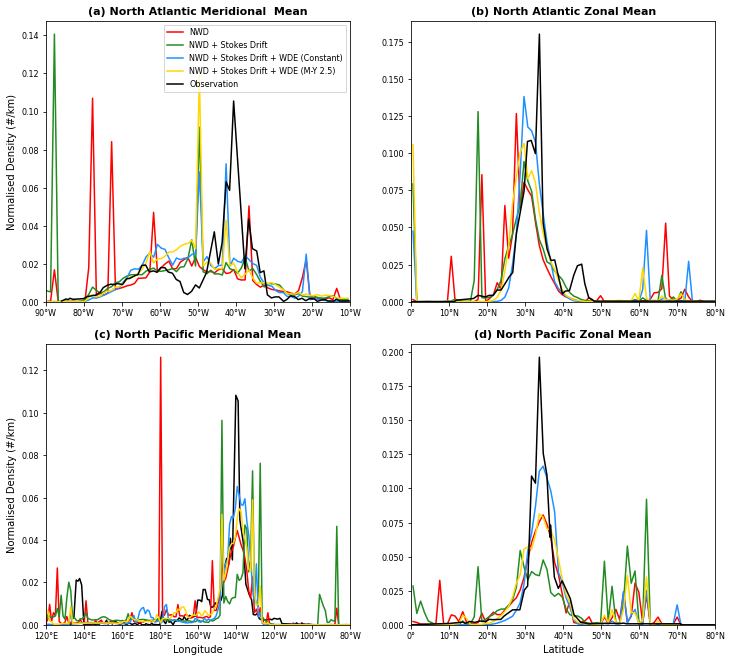

In [28]:
fig = plt.figure(figsize=(12,23))

matplotlib.rc('font', size=8)
matplotlib.rc('axes', titlesize=11)
Colors=['red','forestgreen','dodgerblue','gold','darkmagenta','black']
lw = 1.5

ax1 = plt.subplot(421)
for i, mean in enumerate(NA_zonal_mean_norm):
    ax1.plot(latDA[lat1:lat2], mean, linewidth=lw, label=labels[i], color=Colors[i])
ax1.plot(NA_zonal_x, NA_zonal_y, linewidth=lw, label='Observation', color='black')
ax1.set_title('(a) North Atlantic Meridional  Mean', size=11,fontweight='bold')
ax1.set_ylabel('Normalised Density (#/km)', size=10)
ax1.set_xlim(-90, -10)
ax1.set_ylim(0)
ax1.set_xticks([i * 10 for i in list(range(-9, 0))])
ax1.set_xticklabels([r"90°W", r"80°W", r"70°W", r"60°W", r"50°W", r"40°W", r"30°W", r"20°W", r"10°W"])
ax1.legend()

ax2 = plt.subplot(422)
for i, mean in enumerate(NA_meri_mean_norm):
    ax2.plot(lonDA[lon1:lon2], mean, linewidth=lw, label=labels[i], color=Colors[i])
ax2.plot(NA_meri_x, NA_meri_y, linewidth=lw, label='Observation', color='black')
ax2.set_title('(b) North Atlantic Zonal Mean', size=11, fontweight='bold')
ax2.set_xlim(0, 80)
ax2.set_ylim(0)
ax2.set_xticks([i * 10 for i in list(range(0, 9))])
ax2.set_xticklabels([r"0°", r"10°N", r"20°N", r"30°N", r"40°N", r"50°N", r"60°N", r"70°N", r"80°N"])

ax3 = plt.subplot(423)
ax3.plot(NP_zonal_x, NP_zonal_y, linewidth=lw, label='Observation', color='black')
for i, mean in enumerate(NP_zonal_mean_norm):
    ax3.plot(np.linspace(0, 160, 160), mean, linewidth=lw, label=labels[i], color=Colors[i])
ax3.set_title('(c) North Pacific Meridional Mean', size=11, fontweight='bold')
ax3.set_ylabel('Normalised Density (#/km)', size=10)
ax3.set_xlabel('Longitude', size=10)
ax3.set_xlim(0, 160)
ax3.set_ylim(0)
ax3.set_xticklabels([r"120°E", r"140°E", r"160°E", r"180°E", r"160°W", r"140°W", r"120°W", r"100°W", r"80°W"])
ax3.set_xticks([i * 20 for i in list(range(0, 9))])

ax4 = plt.subplot(424)
for i, mean in enumerate(NP_meri_mean_norm):
    ax4.plot(lonDA[lon1:lon2], mean, linewidth=lw, label=labels[i], color=Colors[i])
ax4.plot(NP_meri_x, NP_meri_y, linewidth=lw, label='Observation', color='black')
ax4.set_title('(d) North Pacific Zonal Mean', size=11, fontweight='bold')
ax4.set_xlabel('Latitude', size=10)
ax4.set_xlim(0, 80)
ax4.set_ylim(0)
ax4.set_xticks([i * 10 for i in list(range(0, 9))])
ax4.set_xticklabels([r"0°", r"10°N", r"20°N", r"30°N", r"40°N", r"50°N", r"60°N", r"70°N", r"80°N"])

fig.subplots_adjust(hspace=0.15)
fig.patch.set_facecolor('white')

plt.savefig('/Users/jakecunningham/Documents/Oxford/Summer Research/Figures/Density_Comparison.png', format='png', dpi=600, bbox_inches = "tight")


In [192]:
import pandas as pd

raw_data = pd.read_excel('/Volumes/4YP/Data/vanSebille_etal_2015_SharableRawData.xlsx')


10809


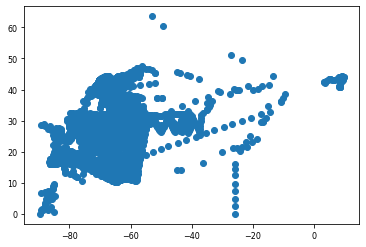

In [212]:
NA_raw_data = raw_data.loc[(raw_data['Latitude (N)'] >= 0) & (raw_data['Latitude (N)'] <= 80) & (raw_data['Longitude (E)'] >= -90) & (raw_data['Longitude (E)'] <= 10)]
NP_raw_data = raw_data.loc[(raw_data['Latitude (N)'] >= 0) & (raw_data['Latitude (N)'] <= 80) & (raw_data['Longitude (E)'] >= 120 & (raw_data['Longitude (E)'] <= -100))]

NA_raw_x = NA_raw_data['Longitude (E)']
NA_raw_y = NA_raw_data['Latitude (N)']

plt.scatter(NA_raw_x, NA_raw_y)


In [225]:
num_bins = 60

NA_lon_labels = np.linspace(-91, 10, 75)
NA_lat_labels = np.linspace(1, 80, 60)

NP_lon_labels = np.linspace(1, 160, 120)
NP_lat_labels = np.linspace(1, 80, 60)

NA_raw_data['Longitude Binned'] = pd.cut(NA_raw_data['Longitude (E)'], bins=75, labels=NA_lon_labels)
NA_raw_data['Latitude Binned'] = pd.cut(NA_raw_data['Latitude (N)'], bins=60, labels=NA_lat_labels)
NA_zonal_mean = NA_raw_data.groupby(['Latitude Binned'])['DebrisDensity [No/KmSq]'].agg('mean').to_numpy()
NA_meri_mean = NA_raw_data.groupby(['Longitude Binned'])['DebrisDensity [No/KmSq]'].agg('mean').to_numpy()

NP_raw_data['Longitude Binned'] = pd.cut(NP_raw_data['Longitude (E)'], bins=120, labels=NP_lon_labels)
NP_raw_data['Latitude Binned'] = pd.cut(NP_raw_data['Latitude (N)'], bins=60, labels=NP_lat_labels)
NP_zonal_mean = NP_raw_data.groupby(['Latitude Binned'])['DebrisDensity [No/KmSq]'].agg('mean').to_numpy()
NP_meri_mean = NP_raw_data.groupby(['Longitude Binned'])['DebrisDensity [No/KmSq]'].agg('mean').to_numpy()

def normalise(x, y):
    to_remove = []
    for i, av in enumerate(y):
        if np.isnan(av) == True:
            to_remove.append(i)
    x = np.delete(x, to_remove)
    y = np.delete(y, to_remove)
    return x, y / integrate.simps(y, x)

NA_lats, NA_zonal_mean_norm = normalise(NA_lat_labels, NA_zonal_mean)
NA_lons, NA_meri_mean_norm = normalise(NA_lon_labels, NA_meri_mean)

NP_lats, NP_zonal_mean_norm = normalise(NP_lat_labels, NP_zonal_mean)
NP_lons, NP_meri_mean_norm = normalise(NP_lon_labels, NP_meri_mean)

/Users/jakecunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/jakecunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/jakecunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

/Users/jakecunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/Users/jakecunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/jakecunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator


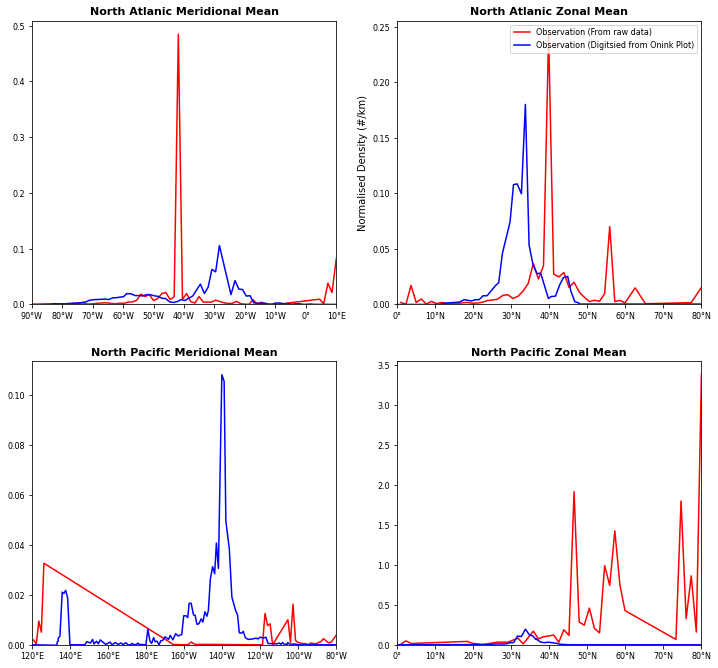

In [220]:
fig = plt.figure(figsize=(12,24))

ax1 = plt.subplot(422)
ax1.plot(NA_lats, NA_zonal_mean_norm, linewidth=lw, label='Observation (From raw data)', color='red')
ax1.plot(NA_meri_x, NA_meri_y, linewidth=lw, label='Observation (Digitsied from Onink Plot)', color='blue')
ax1.set_title('North Atlanic Zonal Mean', size=11,fontweight='bold')
ax1.set_ylabel('Normalised Density (#/km)', size=10)
ax1.set_xlim(0, 80)
ax1.set_ylim(0)
ax1.set_xticklabels([r"0°", r"10°N", r"20°N", r"30°N", r"40°N", r"50°N", r"60°N", r"70°N", r"80°N"])
ax1.set_xticks([i * 10 for i in list(range(0, 9))])
ax1.legend()

ax2 = plt.subplot(421)
ax2.plot(NA_lons, NA_meri_mean_norm, linewidth=lw, label='Observation (From raw data)', color='red')
ax2.plot(NA_zonal_x, NA_zonal_y, linewidth=lw, label='Observation (Digitsied from Onink Plot)', color='blue')
ax2.set_title('North Atlanic Meridional Mean', size=11,fontweight='bold')
ax2.set_xlim(-90, 10)
ax2.set_ylim(0)
ax2.set_xticks([i * 10 for i in list(range(-9, 2))])
ax2.set_xticklabels([r"90°W", r"80°W", r"70°W", r"60°W", r"50°W", r"40°W", r"30°W", r"20°W", r"10°W", r"0°", r"10°E"])

ax3 = plt.subplot(423)
ax3.plot(NP_lons, NP_meri_mean_norm, linewidth=lw, label='Observation (From raw data)', color='red')
ax3.plot(NP_zonal_x, NP_zonal_y, linewidth=lw, label='Observation (Digitsied from Onink Plot)', color='blue')
ax3.set_title('North Pacific Meridional Mean', size=11,fontweight='bold')
ax3.set_xlim(0, 160)
ax3.set_ylim(0)
ax3.set_xticklabels([r"120°E", r"140°E", r"160°E", r"180°E", r"160°W", r"140°W", r"120°W", r"100°W", r"80°W"])
ax3.set_xticks([i * 20 for i in list(range(0, 9))])

ax4 = plt.subplot(424)
ax4.plot(NP_lats, NP_zonal_mean_norm, linewidth=lw, label='Observation (From raw data)', color='red')
ax4.plot(NP_meri_x, NP_meri_y, linewidth=lw, label='Observation (Digitsied from Onink Plot)', color='blue')
ax4.set_title('North Pacific Zonal Mean', size=11,fontweight='bold')
ax4.set_xlim(0, 80)
ax4.set_ylim(0)
ax4.set_xticklabels([r"0°", r"10°N", r"20°N", r"30°N", r"40°N", r"50°N", r"60°N", r"70°N", r"80°N"])
ax4.set_xticks([i * 10 for i in list(range(0, 9))])

#plt.savefig('/Users/jakecunningham/Documents/Oxford/Summer Research/Figures/Density_Comparison_Observations.png', format='png', dpi=600, bbox_inches = "tight")

